# Simple Image Classification with Neural Networks

In [1]:
from tensorflow import  keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import random

# 👉The "Fashion MNIST" Data Set

In [ ]:
(X_train, y_train),(X_test, y_test) =  keras.datasets.fashion_mnist.load_data()

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_label = dict(zip(range(10), class_names))
class_label

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

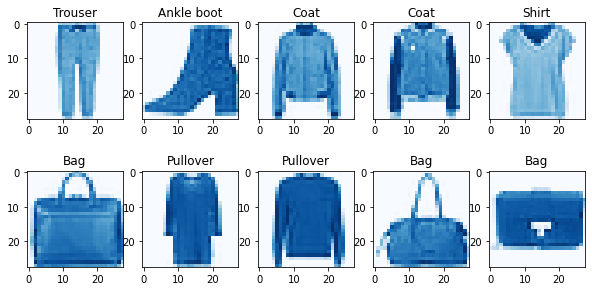

In [ ]:
# Display 10 random images from the Fashion MNIST data set and annotate the image with the class label.
fig, axs = plt.subplots(2, 5, figsize=(10,5))

for i in range(10):
    n = random.randint(0, len(X_test))
    image = X_test[n]
    label = y_test[n]
    ax = axs[i//5, i%5]
    ax.set_title(class_label.get(label))
    ax.imshow(image, cmap='Blues') # show the plot of this array using blue pallete.

plt.show()

# 💪Challenge 1: Build a Fashion MNIST Classifier

## Build, train and evaluate a neural network that is able to classify these images with high accuracy

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
net = Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[1] , X_train.shape[2])),
     
])
net.output_shape

(None, 784)

In [ ]:
# add layers here 

from tensorflow.keras.metrics import AUC

num_hidden_n1 = 128
num_hidden_n2 = 128
num_classes = len(class_label)

#first hidden layer
net.add(Dense(num_hidden_n1, kernel_initializer='normal', activation='relu'))
net.add(BatchNormalization()) #batch normalization layer
net.add(Dropout(0.3))   #dropout layer 
# second hidden layer
net.add(Dense(num_hidden_n2, kernel_initializer='normal', activation='relu'))
net.add(Dropout(0.3))   #dropout layer

#output layer
net.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
                           
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [ ]:
optimizer = 'adam'
#optimizer = keras.optimizers.SGD(lr=0.1, decay=0.1, momentum=0.1)

#OR 
#from keras import optimizers
# there are many more parameters that we could be adding here
# optimizer = keras.optimizers.SGD(lr=0.01, decay=0.1, momentum=0.1)
# learning rate is set in the optimizer
# learning rates 0.1,0.01,0.001 are good values to test and start with

# Compile model
net.compile(loss='categorical_crossentropy', # loss function is defined by the task 
                  optimizer=optimizer,
                  metrics=['accuracy', AUC()])

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_enc = to_categorical(y_train, num_classes)
y_test_enc = to_categorical(y_test, num_classes)

In [ ]:
history = net.fit(  X_train,
          y_train_enc,
          epochs=25,
          batch_size=200, # if unspecified defaulted to 32
          verbose=0,
          validation_data=(X_test, y_test_enc) #OR validation_split=0.3 
          )

scores = net.evaluate(X_test, y_test_enc, verbose=1)
print("Error Rate: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.3435 - accuracy: 0.8772 - auc: 0.9904
Error Rate: 12.28%


In [ ]:
scores

[0.3435254991054535, 0.8772000074386597, 0.9904397130012512]

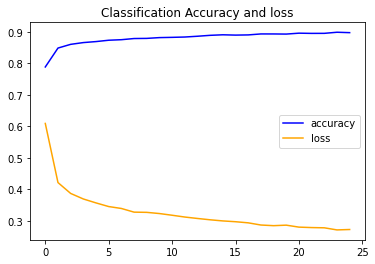

In [ ]:
from tensorflow.python.keras.callbacks import History

def plot_training_history(history: History):
    plt.title('Classification Accuracy and loss')
    plt.plot(history.history['accuracy'], color='blue', label='accuracy')
    plt.plot(history.history['loss'], color='orange', label='loss')
    plt.legend()
    plt.show()

def plot_training_history1(history: History):
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='validation')
    plt.legend()
    plt.show()

plot_training_history(history)

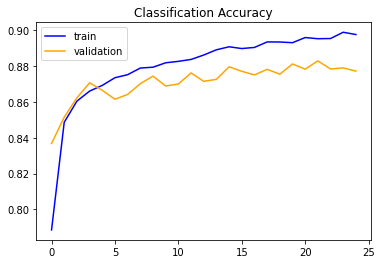

In [ ]:
plot_training_history1(history)

In [ ]:
yhat = net.predict(X_test)     # it is an array of vectors of 10 elements which are probabilities of belonging to that particular class

# Finding the most probable class
yhat_c = np.argmax(yhat, axis=1)  # argmax gives the indices with the highest probability; we use them as predicted class labels

yhat_c

array([9, 2, 1, ..., 8, 1, 5])

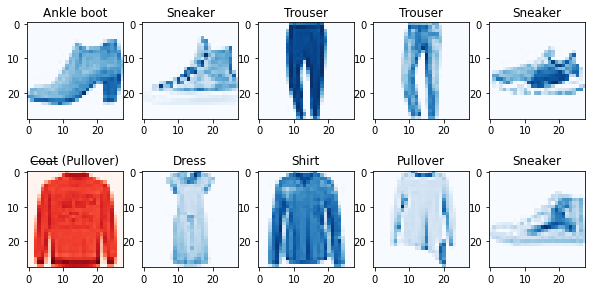

In [ ]:
# Display 10 random images from the Fashion MNIST data set
# annotate the image with the predicted class label.
# show false predicted images with red

fig, axs = plt.subplots(2, 5, figsize=(10,5))

for i in range(10):
    n = random.randint(0, len(X_test))
    image = X_test[n]
    label_pred = yhat_c[n]    
    label_true = y_test[n]
    if(label_pred==label_true):
        color ='Blues'
        title = class_label.get(label_true)
    else:
        color = 'Reds'
        title = ''  # strike thru the false predicted label text
        for c in class_label.get(label_pred):
            title += c + '\u0336'
        title += f" ({class_label.get(label_true)})"

    ax = axs[i//5, i%5]
    ax.set_title(title)
    ax.imshow(image, cmap=color) # show the plot of this array using blue pallete.

plt.show()

# 💪Challenge 2: Energy Conservation

Let's try to simplify the model by letting out the second hidden layer, putting the batch normalization just after the flattening (before the 'relu' activation). Furthermore  the number of epochs will be reduced to 10.

In [ ]:
model_egy = Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[1] , X_train.shape[2])),
    BatchNormalization(),
    keras.layers.Dense(num_hidden_n1, kernel_initializer='normal', activation='relu'),
    Dropout(0.3),
    Dense(num_classes, kernel_initializer='normal', activation='softmax')
])

model_egy.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 104,906
Trainable params: 103,338
Non-trainable params: 1,568
_________________________________________________________________


In [ ]:
optimizer = 'adam'
#optimizer = keras.optimizers.SGD(lr=0.1, decay=0.1, momentum=0.1)

#OR 
#from keras import optimizers
# there are many more parameters that we could be adding here
# optimizer = keras.optimizers.SGD(lr=0.01, decay=0.1, momentum=0.1)
# learning rate is set in the optimizer
# learning rates 0.1,0.01,0.001 are good values to test and start with

# Compile model
model_egy.compile(loss='categorical_crossentropy', # loss function is defined by the task 
                  optimizer=optimizer,
                  metrics=['accuracy', AUC()])

In [ ]:
history = model_egy.fit(  X_train,
          y_train_enc,
          epochs=10,
          batch_size=200, # if unspecified defaulted to 32
          verbose=0,
          validation_data=(X_test, y_test_enc) #OR validation_split=0.3 
          )

scores = model_egy.evaluate(X_test, y_test_enc, verbose=1)
print("Error Rate: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.3327 - accuracy: 0.8852 - auc_1: 0.9914
Error Rate: 11.48%


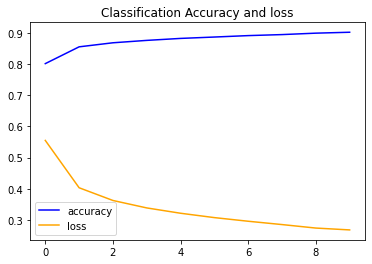

In [ ]:
plot_training_history(history)

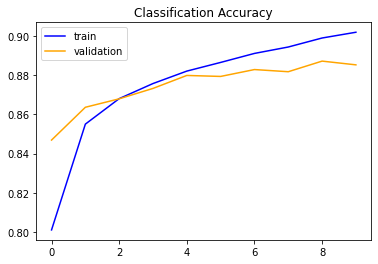

In [ ]:
plot_training_history1(history)

The simplified model classifies even a bit better than the first one (smaller error rate)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a109ea11-a7da-42aa-8af0-3a0cdafc917e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>